# **Checkpoint 6**

Write out the answer in the text block. Display how you arrive to the answer in a code block below the text block. 

In [ ]:
import pandas as pd
df = pd.read_csv('https://www.dropbox.com/s/2ervif08bxu4id3/WorldBankData.csv?dl=1')
df

,Country Name,Country Code,Indicator Name,Year,Value
0,World,WLD,Access to electricity (% of population),2000,78.736065
1,Afghanistan,AFG,Access to electricity (% of population),2000,NaN
2,Albania,ALB,Access to electricity (% of population),2000,100.000000
3,Algeria,DZA,Access to electricity (% of population),2000,NaN
4,American Samoa,ASM,Access to electricity (% of population),2000,NaN
...,...,...,...,...,...
309555,Virgin Islands (U.S.),VIR,Women who were first married by age 18 (% of w...,2019,NaN
309556,West Bank and Gaza,PSE,Women who were first married by age 18 (% of w...,2019,NaN
309557,"Yemen, Rep.",YEM,Women who were first married by age 18 (% of w...,2019,NaN
309558,Zambia,ZMB,Women who were first married by age 18 (% of w...,2019,NaN


**Question 1.** How many records (or rows) are in the file?

Answer: 309,560 

In [ ]:
df.count()

Country Name      309560
Country Code      309560
Indicator Name    309560
Year              309560
Value             209694
dtype: int64

**Question 2.** What is (are) the name(s) of the column(s) in the file that have missing values?

Answer: "Value" is the only column to contain null values



In [ ]:
df.count()

Country Name      309560
Country Code      309560
Indicator Name    309560
Year              309560
Value             209694
dtype: int64

**Question 3.** How many unique country names are in the file?

Answer: 218

In [ ]:
df['Country Name'].nunique()

218

**Question 4.** What was Belgium's urban population percent in 2005? 

**Hint #1:** It may be helpful to first explore the unique values in the Indicator Name column.

Hint #2: It may be helpful to review and use the dataframe filtering concepts we covered on the DataFrames Day 2 day.

Answer: 97.403%

In [ ]:
filtered_df = df[(df['Indicator Name'] == 'Urban population (% of total population)') & (df['Year'] == 2005) & (df['Country Name'] == 'Belgium')]
filtered_df
#'Urban population (% of total population)'

,Country Name,Country Code,Indicator Name,Year,Value
92015,Belgium,BEL,Urban population (% of total population),2005,97.403


**Question 5.** What is the average % of individuals using the internet across all the countries in 2000? In 2019? 

Display an image that shows both a histogram for the percent of individuals using the internet among all the countries in 2000 in one color and a histogram for the percent of individuals using the internet among all the countries in 2019 on the same image in another color. Also include the average % of individuals using the internet in 2000 and the average for 2019 as text on the image. Include a title in the image.

**Hint 1:** It may be helpful to first filter the df dataframe to only include rows that include the Indicator Name "Individuals using the Internet (% of population)" from either 2019 or 2000 and save that filtered dataframe to a new dataframe (such as internetYearsDF). Find the averages and create the histagrams off the new dataframe.

**Hint 2:** You'll want to use the 'hue' functionality to display both histagrams on the same image and in different colors.

Answer: 2000: 8.75%; 2019: 76.74%

Text(0.5, 0, 'Percentage')

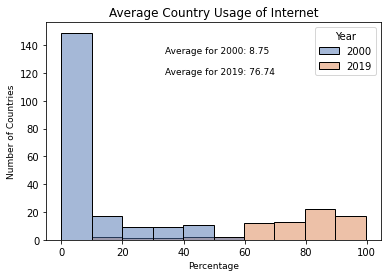

In [ ]:
import seaborn as sns
from matplotlib import pyplot as plt


new_df = df[(df['Indicator Name'] == 'Individuals using the Internet (% of population)') & ((df['Year'] == 2000) | (df['Year'] == 2019))]
new_df = new_df.query('Value == Value')

average_2000 = str(round(new_df[new_df['Year'] == 2000].Value.mean(), 2))
average_2019 = str(round(new_df[new_df['Year'] == 2019].Value.mean(), 2))

text = (f'Average for 2000: {average_2000} \n \nAverage for 2019: {average_2019}')

plt.text(.4, .70, text, fontsize = 9, transform = plt.gcf().transFigure)
plt.title('Average Country Usage of Internet')
spencer_chart = sns.histplot(new_df, x='Value', hue = 'Year', palette = 'deep')
spencer_chart.set_ylabel('Number of Countries',fontsize = 9)
spencer_chart.set_xlabel('Percentage', fontsize = 9)


**Question 6.** What is the min, median, and max number of *females* who died from CVD, cancer, diabetes or CRD between exact ages of 30 and 70 in 2019 (in %)? 

What is the min, median, and max number of *males* who died from CVD, cancer, diabetes or CRD between exact ages of 30 and 70 in 2019 (in %)?

Display an image that shows both a box plot for the females in this criteria and another box plot for the males in this criteria in the same image. Include the min, median and max numbers for female and the min, median and max numbers for male as text on the image. Include a title in the image.

**Hint:** It may be helpful to first filter the df dataframe and saved that filtered dataframe to a new dataframe (maybe mortality_df). Filter to show Females who died from CVD, cancer, diabetes or CRD between exact ages of 30 and 70 OR males who died from CVD, cancer, diabetes, or CRD between exact ages of 30 and 70. In addition, both criteria need to be from 2019.

Answer: Female: Min: 4.4, Median: 16.4, Max: 43.7; Male: Min: 9.6, Median: 22.1, Max: 58.4

[Text(0, 0.5, ''), Text(0.5, 0, 'Percentage')]

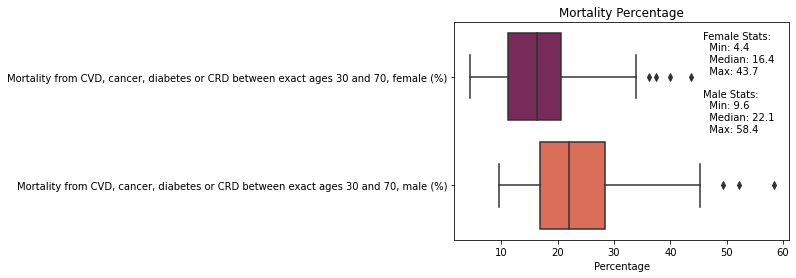

In [ ]:
mortality_df = df[((df['Indicator Name'] == 'Mortality from CVD, cancer, diabetes or CRD between exact ages 30 and 70, female (%)') |
                    (df['Indicator Name'] == 'Mortality from CVD, cancer, diabetes or CRD between exact ages 30 and 70, male (%)')) &
                    (df['Year'] == 2019)
                  ]

mortality_df = mortality_df.query('Value == Value')

mortality_df

minWomen = str(mortality_df[mortality_df["Indicator Name"] == 'Mortality from CVD, cancer, diabetes or CRD between exact ages 30 and 70, female (%)'].Value.min())

medianWomen = str(mortality_df[mortality_df["Indicator Name"] == 'Mortality from CVD, cancer, diabetes or CRD between exact ages 30 and 70, female (%)'].Value.median())

maxWomen = str(mortality_df[mortality_df["Indicator Name"] == 'Mortality from CVD, cancer, diabetes or CRD between exact ages 30 and 70, female (%)'].Value.max())

minMen = str(mortality_df[mortality_df["Indicator Name"] == 'Mortality from CVD, cancer, diabetes or CRD between exact ages 30 and 70, male (%)'].Value.min())

medianMen = str(mortality_df[mortality_df["Indicator Name"] == 'Mortality from CVD, cancer, diabetes or CRD between exact ages 30 and 70, male (%)'].Value.median())

maxMen = str(mortality_df[mortality_df["Indicator Name"] == 'Mortality from CVD, cancer, diabetes or CRD between exact ages 30 and 70, male (%)'].Value.max())

text = 'Female Stats: \n  Min: ' + minWomen + '\n  Median: ' + medianWomen + '\n  Max: ' + maxWomen + '\n\nMale Stats: \n  Min: ' + minMen + '\n  Median: ' + medianMen + '\n  Max: ' + maxMen

plt.title('Mortality Percentage')
plt.text(.70,.50,text, fontsize=10, transform=plt.gcf().transFigure)

tom_chart = sns.boxplot(x=mortality_df.Value, y=mortality_df['Indicator Name'], palette='rocket')
#tom_chart.set(ylabel = None, xlabel = 'Percentage')